In [5]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer,StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('archive/olist_analyse.csv',low_memory=False)
df

,freq_achat,delais_respecter,seller_in_state,customer_state,recence,delai_livraison,payment_installments,review_score,category,price,freight_value,produit_volume_cm_cube,product_weight_g
0,1,oui,non,SP,111.0,6.0,8.0,5.0,Home and Decor,129.90,12.00,7616.0,1500.0
1,1,oui,non,SP,114.0,3.0,1.0,4.0,Health and Beauty,18.90,8.29,5148.0,375.0
2,1,oui,oui,SC,537.0,26.0,8.0,3.0,Leisure and Entertainment,69.00,17.22,43750.0,1500.0
3,1,oui,oui,PA,321.0,20.0,4.0,4.0,Electronics and Technology,25.99,17.63,1045.0,150.0
4,1,oui,non,SP,288.0,13.0,6.0,5.0,Electronics and Technology,180.00,16.89,528.0,6050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,1,oui,oui,PE,447.0,28.0,10.0,5.0,Health and Beauty,1570.00,497.42,503250.0,60000.0
93354,1,oui,oui,BA,262.0,30.0,1.0,4.0,Health and Beauty,64.89,19.69,32076.0,1720.0
93355,1,oui,non,MT,568.0,15.0,1.0,5.0,Electronics and Technology,89.90,22.56,3315.0,600.0
93356,1,oui,oui,ES,119.0,12.0,5.0,5.0,Leisure and Entertainment,115.00,18.69,4480.0,444.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   freq_achat              93358 non-null  int64  
 1   delais_respecter        93358 non-null  object 
 2   seller_in_state         93358 non-null  object 
 3   customer_state          93358 non-null  object 
 4   recence                 93358 non-null  float64
 5   delai_livraison         93358 non-null  float64
 6   payment_installments    93358 non-null  float64
 7   review_score            93358 non-null  float64
 8   category                93358 non-null  object 
 9   price                   93358 non-null  float64
 10  freight_value           93358 non-null  float64
 11  produit_volume_cm_cube  93358 non-null  float64
 12  product_weight_g        93358 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 9.3+ MB


In [6]:
num_cols = df._get_numeric_data().columns
print(num_cols)
cols = df.columns
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)


Index(['freq_achat', 'recence', 'delai_livraison', 'payment_installments',
       'review_score', 'price', 'freight_value', 'produit_volume_cm_cube',
       'product_weight_g'],
      dtype='object')
['delais_respecter', 'customer_state', 'seller_in_state', 'category']
[1, 2, 3, 8]


In [8]:
X = df

def log_transform(x):
    return np.log(x)

transformer = FunctionTransformer(log_transform)


quantitative_pipeline = make_pipeline(transformer,StandardScaler())

preprocessing = ColumnTransformer([("scaling",quantitative_pipeline,num_cols)])





]

In [30]:
numerical_transformer = make_pipeline(
    FunctionTransformer(func=np.abs),
    FunctionTransformer(func=np.log1p),
    StandardScaler()
)

transformations = [
    ('log', numerical_transformer, num_cols),
    # ('log', FunctionTransformer(np.log1p), num_cols),
    # ('standardize', StandardScaler(), num_cols)
]
ct = ColumnTransformer(transformations, remainder='passthrough')

list_col = list(num_cols)+ list(cat_cols)


df_transformed = pd.DataFrame(ct.fit_transform(df), columns=list_col)

In [31]:
df_transformed

,freq_achat,recence,delai_livraison,payment_installments,review_score,price,freight_value,produit_volume_cm_cube,product_weight_g,delais_respecter,customer_state,seller_in_state,category
0,-0.17019,-0.484033,-0.771918,1.75582,0.587521,0.452749,-0.761036,0.006298,0.392843,oui,non,SP,Home and Decor
1,-0.17019,-0.455757,-1.690854,-0.880238,0.042333,-1.611756,-1.369347,-0.293515,-0.630645,oui,non,SP,Health and Beauty
2,-0.17019,1.194742,1.444772,1.75582,-0.624923,-0.233264,-0.149901,1.344752,0.392843,oui,oui,SC,Leisure and Entertainment
3,-0.17019,0.645648,1.032093,0.725661,0.042333,-1.277761,-0.109614,-1.513828,-1.305166,oui,oui,PA,Electronics and Technology
4,-0.17019,0.529984,0.366286,1.315364,0.587521,0.807915,-0.182992,-2.035801,1.423572,oui,non,SP,Electronics and Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,-0.17019,0.998914,1.562114,2.107517,0.587521,3.176286,5.840544,3.214905,3.119755,oui,oui,PE,Health and Beauty
93354,-0.17019,0.429139,1.671626,-0.880238,0.042333,-0.29958,0.080255,1.107114,0.493967,oui,oui,BA,Health and Beauty
93355,-0.17019,1.25467,0.585556,-0.880238,0.587521,0.053076,0.315424,-0.630433,-0.283883,oui,non,MT,Electronics and Technology
93356,-0.17019,-0.41023,0.244595,1.045199,0.587521,0.320308,-0.009431,-0.399907,-0.506075,oui,oui,ES,Leisure and Entertainment


In [34]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   freq_achat              93358 non-null  object
 1   recence                 93358 non-null  object
 2   delai_livraison         93358 non-null  object
 3   payment_installments    93358 non-null  object
 4   review_score            93358 non-null  object
 5   price                   93358 non-null  object
 6   freight_value           93358 non-null  object
 7   produit_volume_cm_cube  93358 non-null  object
 8   product_weight_g        93358 non-null  object
 9   delais_respecter        93358 non-null  object
 10  customer_state          93358 non-null  object
 11  seller_in_state         93358 non-null  object
 12  category                93358 non-null  object
dtypes: object(13)
memory usage: 9.3+ MB


In [36]:
list_to_change =['freq_achat', 'recence', 'delai_livraison', 'payment_installments',
       'review_score', 'price', 'freight_value', 'produit_volume_cm_cube',
       'product_weight_g']

for col in list_to_change:
    df_transformed[col]=df_transformed[col].astype(float)

In [37]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   freq_achat              93358 non-null  float64
 1   recence                 93358 non-null  float64
 2   delai_livraison         93358 non-null  float64
 3   payment_installments    93358 non-null  float64
 4   review_score            93358 non-null  float64
 5   price                   93358 non-null  float64
 6   freight_value           93358 non-null  float64
 7   produit_volume_cm_cube  93358 non-null  float64
 8   product_weight_g        93358 non-null  float64
 9   delais_respecter        93358 non-null  object 
 10  customer_state          93358 non-null  object 
 11  seller_in_state         93358 non-null  object 
 12  category                93358 non-null  object 
dtypes: float64(9), object(4)
memory usage: 9.3+ MB


In [39]:
cat_clo_number = [i for i, c in enumerate(df_transformed.columns) if c in df_transformed[cat_cols].columns]
print(cat_clo_number)

[9, 10, 11, 12]


In [40]:
kpro = KPrototypes(n_clusters=7, init='Huang', random_state=42, max_iter=5, n_init=10, n_jobs=-2, gamma=.25)
clusters = kpro.fit_predict(df_transformed,categorical=cat_clo_number)

In [41]:
df_transformed

,freq_achat,recence,delai_livraison,payment_installments,review_score,price,freight_value,produit_volume_cm_cube,product_weight_g,delais_respecter,customer_state,seller_in_state,category
0,-0.17019,-0.484033,-0.771918,1.755820,0.587521,0.452749,-0.761036,0.006298,0.392843,oui,non,SP,Home and Decor
1,-0.17019,-0.455757,-1.690854,-0.880238,0.042333,-1.611756,-1.369347,-0.293515,-0.630645,oui,non,SP,Health and Beauty
2,-0.17019,1.194742,1.444772,1.755820,-0.624923,-0.233264,-0.149901,1.344752,0.392843,oui,oui,SC,Leisure and Entertainment
3,-0.17019,0.645648,1.032093,0.725661,0.042333,-1.277761,-0.109614,-1.513828,-1.305166,oui,oui,PA,Electronics and Technology
4,-0.17019,0.529984,0.366286,1.315364,0.587521,0.807915,-0.182992,-2.035801,1.423572,oui,non,SP,Electronics and Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,-0.17019,0.998914,1.562114,2.107517,0.587521,3.176286,5.840544,3.214905,3.119755,oui,oui,PE,Health and Beauty
93354,-0.17019,0.429139,1.671626,-0.880238,0.042333,-0.299580,0.080255,1.107114,0.493967,oui,oui,BA,Health and Beauty
93355,-0.17019,1.254670,0.585556,-0.880238,0.587521,0.053076,0.315424,-0.630433,-0.283883,oui,non,MT,Electronics and Technology
93356,-0.17019,-0.410230,0.244595,1.045199,0.587521,0.320308,-0.009431,-0.399907,-0.506075,oui,oui,ES,Leisure and Entertainment


In [46]:
df['label_cluster'] = clusters
df['label_cluster'].value_counts()

4    23180
5    21069
0    15012
3    11441
6    10781
2     9075
1     2800
Name: label_cluster, dtype: int64

In [50]:
grouped_df = df.groupby('label_cluster',) .agg({'delais_respecter': lambda x: x.value_counts().index[0],
                    'seller_in_state': lambda x: x.value_counts().index[0],
                    'freq_achat': 'mean',
                    'customer_state': lambda x: x.value_counts().index[0],
                    'recence': 'mean',
                    'delai_livraison': 'mean',
                    'payment_installments': 'mean',
                    'review_score': 'mean',
                    'category': lambda x: x.value_counts().index[0],
                    'price': 'mean',
                    'freight_value': 'mean',
                    'produit_volume_cm_cube': 'mean',
                    'product_weight_g': 'mean'})

In [51]:
grouped_df.reset_index()

,label_cluster,delais_respecter,seller_in_state,freq_achat,customer_state,recence,delai_livraison,payment_installments,review_score,category,price,freight_value,produit_volume_cm_cube,product_weight_g
0,0,oui,oui,1.000000,SP,276.745204,12.722689,6.240474,4.560152,Leisure and Entertainment,189.245944,20.234678,10198.802225,1231.154243
1,1,oui,non,2.113929,SP,263.858153,12.248800,3.373042,4.213422,Home and Decor,126.940935,23.477695,17782.676813,2406.342424
2,2,oui,oui,1.000000,SP,240.686391,22.768926,2.917466,1.182645,Home and Decor,125.529883,22.336994,13135.065629,1638.102865
3,3,oui,non,1.000000,SP,39.570492,6.721790,2.203304,4.550739,Home and Decor,94.243263,17.615014,8328.473939,920.990240
4,4,oui,non,1.000000,SP,271.111303,10.637489,1.573727,4.510548,Electronics and Technology,46.337958,13.978067,3302.571218,315.037525
5,5,oui,non,1.000000,SP,284.514975,12.182401,1.504248,4.565262,Home and Decor,115.088808,19.847804,19968.079335,2428.478618
6,6,oui,oui,1.000093,SP,230.477228,14.420184,4.993600,4.128328,Home and Decor,360.368242,55.760204,64567.521009,10473.752667


In [52]:
df_expli = grouped_df.drop(['delais_respecter','customer_state',],axis=1)

In [53]:
df_expli

,seller_in_state,freq_achat,recence,delai_livraison,payment_installments,review_score,category,price,freight_value,produit_volume_cm_cube,product_weight_g
label_cluster,,,,,,,,,,,
0,oui,1.000000,276.745204,12.722689,6.240474,4.560152,Leisure and Entertainment,189.245944,20.234678,10198.802225,1231.154243
1,non,2.113929,263.858153,12.248800,3.373042,4.213422,Home and Decor,126.940935,23.477695,17782.676813,2406.342424
2,oui,1.000000,240.686391,22.768926,2.917466,1.182645,Home and Decor,125.529883,22.336994,13135.065629,1638.102865
3,non,1.000000,39.570492,6.721790,2.203304,4.550739,Home and Decor,94.243263,17.615014,8328.473939,920.990240
4,non,1.000000,271.111303,10.637489,1.573727,4.510548,Electronics and Technology,46.337958,13.978067,3302.571218,315.037525
5,non,1.000000,284.514975,12.182401,1.504248,4.565262,Home and Decor,115.088808,19.847804,19968.079335,2428.478618
6,oui,1.000093,230.477228,14.420184,4.993600,4.128328,Home and Decor,360.368242,55.760204,64567.521009,10473.752667


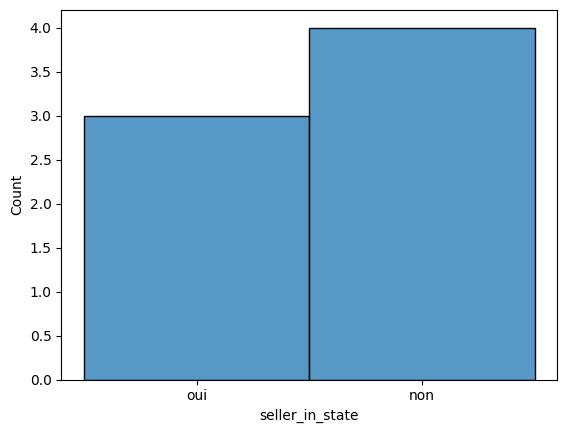

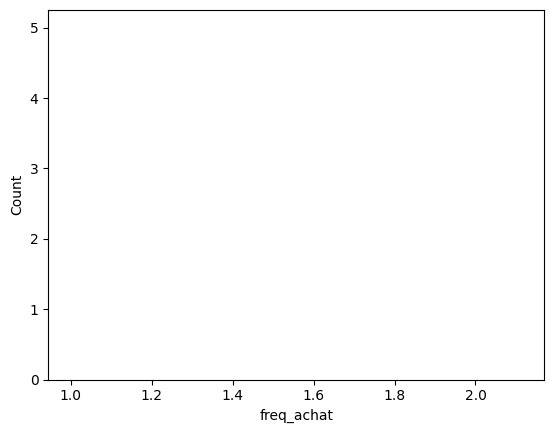

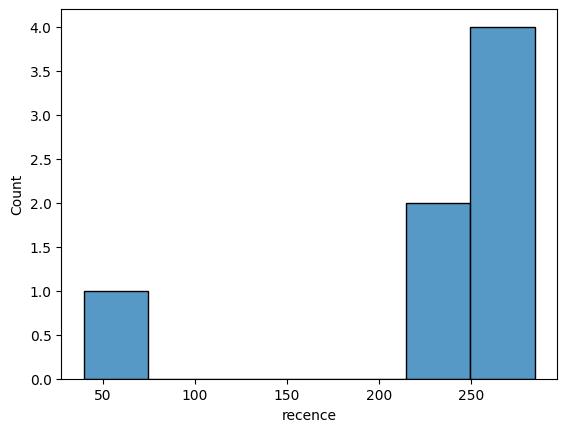

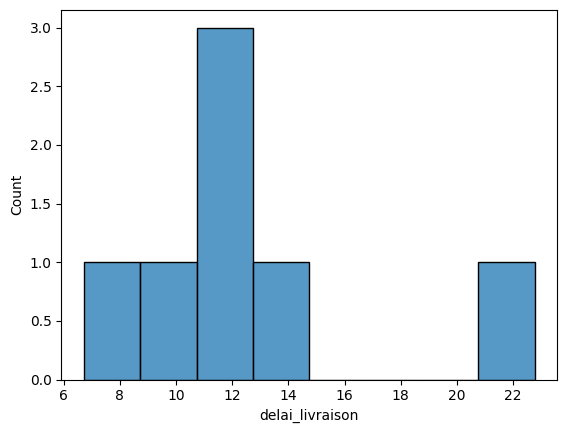

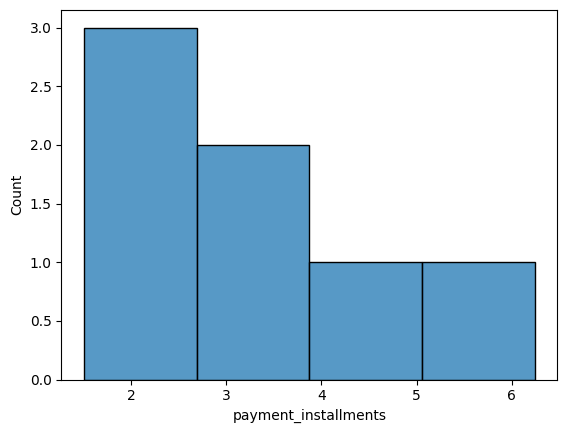

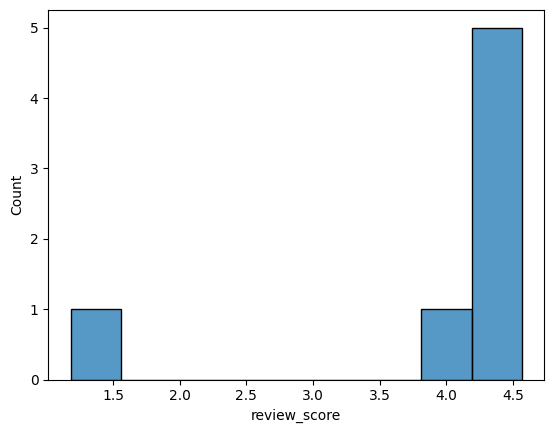

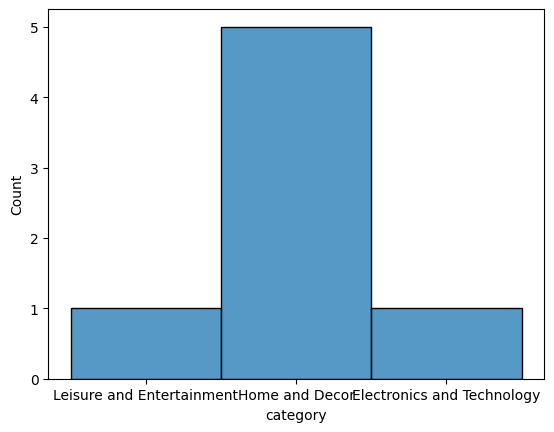

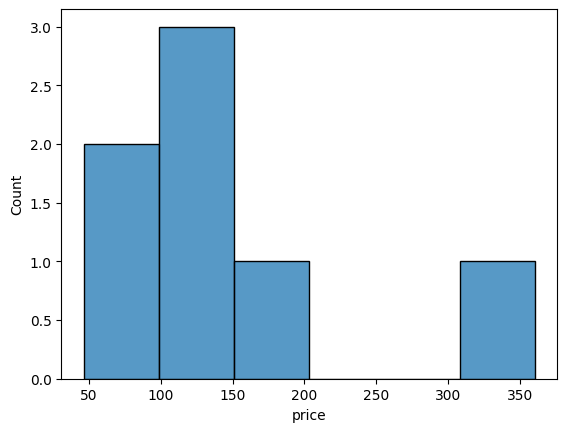

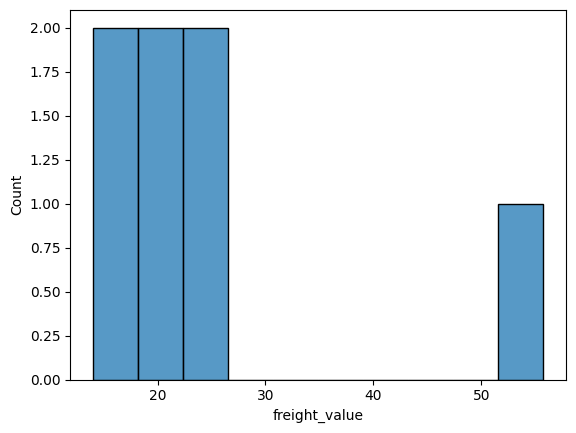

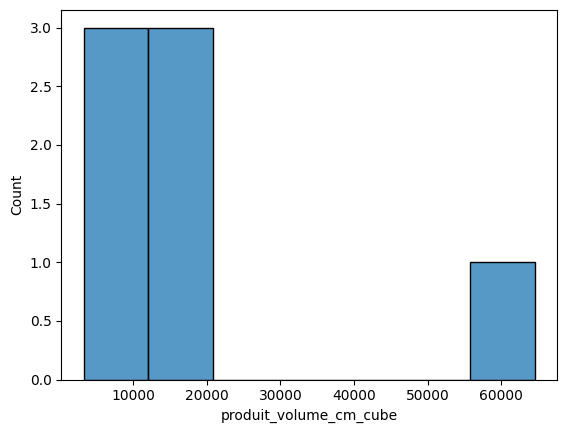

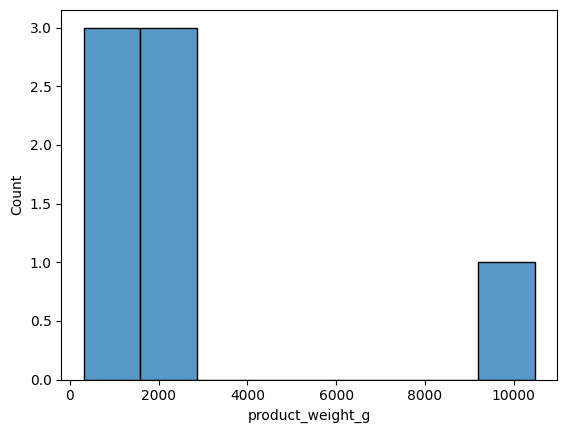

In [54]:
for col in df_expli.columns:
    sns.histplot(df_expli[col])
    plt.show()